# Loading necessary libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset :

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.shape

(8124, 23)

We have 8124 rows and 23 features including the target.

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# Checking the number of unique values in each Column

df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

#### Checking for any Null Values :

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**No** Null Values are present in our Dataset.

# Preprocessing the Data

In [8]:
# Checking the distribution of various classes of mushroom

df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

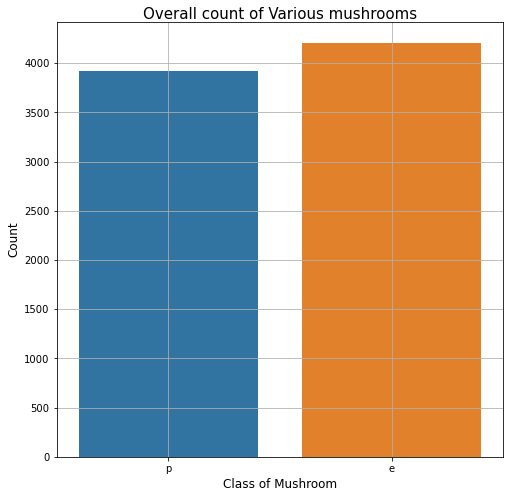

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x = df["class"])
plt.title("Overall count of Various mushrooms", fontsize = 15, pad=0.5 )
plt.xlabel("Class of Mushroom", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.grid()

#### 

In [10]:
# Creating a copy of the original Dataset as backup

df1 = df.copy()
df2 = df1.copy()


We can see that the data in our hand is having all the features as Categorical Data.

Hence, we'll have to encode the data in order to make ML Models.


In [11]:
# Using Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])
    
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


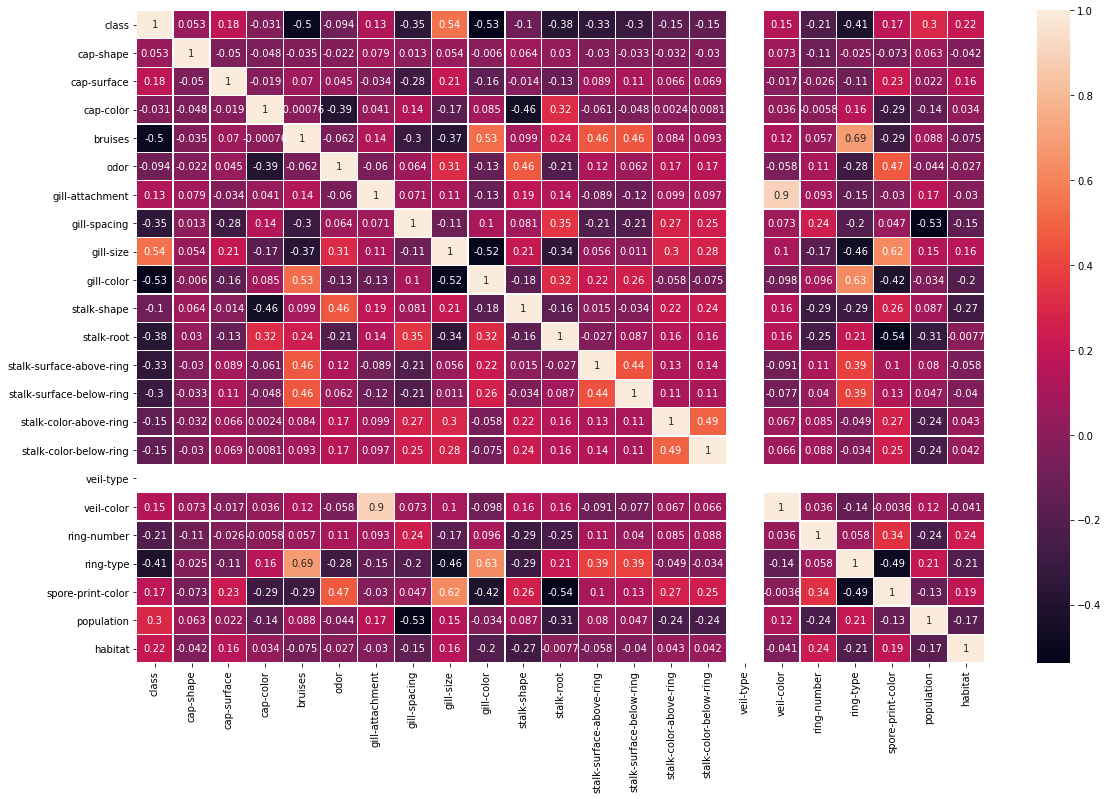

In [12]:
## Making a Heatmap of the Encoded data

cor = df.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor, annot=True,linewidths=0.2);

Defining our X and y variables

In [13]:
# We'll take Class as y variable as we've to classify the mushroom.

X = df.drop('class' , axis=1)
y = df['class']

In [14]:
## Performing Chi2 test to see if there are any irrelavent features which we could removee before making various models.

In [15]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X,y)

chi_scores

(array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
        7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
        5.95776447e+03, 3.65941055e+01, 1.18602922e+03, 2.22982400e+02,
        2.06648180e+02, 1.19792216e+02, 1.09789410e+02,            nan,
        5.12682568e+00, 2.56463352e+01, 1.95061015e+03, 3.79132729e+02,
        3.11766736e+02, 7.51309489e+02]),
 array([2.86046529e-005, 1.77936190e-048, 6.91713451e-004, 1.06903680e-261,
        2.96868171e-018, 6.11673438e-002, 8.06129280e-182, 0.00000000e+000,
        0.00000000e+000, 1.45470942e-009, 6.63061675e-260, 2.02239248e-050,
        7.39886855e-047, 7.02463813e-028, 1.08973983e-025,             nan,
        2.35587753e-002, 4.10073541e-007, 0.00000000e+000, 1.92211948e-084,
        9.00236554e-070, 2.08291637e-165]))

Here we have 2 arrays as the result. 

The First array is the Chi scores and the Second array represents the corresponding p-values.

In [16]:
p_val = pd.Series(chi_scores[1],index = X.columns)
p_val

cap-shape                    2.860465e-05
cap-surface                  1.779362e-48
cap-color                    6.917135e-04
bruises                     1.069037e-261
odor                         2.968682e-18
gill-attachment              6.116734e-02
gill-spacing                8.061293e-182
gill-size                    0.000000e+00
gill-color                   0.000000e+00
stalk-shape                  1.454709e-09
stalk-root                  6.630617e-260
stalk-surface-above-ring     2.022392e-50
stalk-surface-below-ring     7.398869e-47
stalk-color-above-ring       7.024638e-28
stalk-color-below-ring       1.089740e-25
veil-type                             NaN
veil-color                   2.355878e-02
ring-number                  4.100735e-07
ring-type                    0.000000e+00
spore-print-color            1.922119e-84
population                   9.002366e-70
habitat                     2.082916e-165
dtype: float64

Now we can see the p-values for their corresponding features.

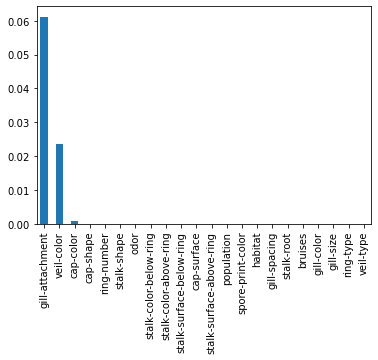

In [17]:
# Rearranging the p values in Decending order and plotting a bar graph

p_val.sort_values(ascending = False , inplace = True)

p_val.plot.bar();

In [18]:
X = X.drop(['gill-attachment' ,'veil-type'] , axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [19]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 10)


# Making Various Models 

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

### 1. Logistic Regression Classification :

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

In [22]:
print(f"Accuracy score = {accuracy_score(y_test,prediction)}")
print("\nf1_score is :" ,f1_score(y_test,prediction))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,prediction)}")

Accuracy score = 0.9502708025603152

f1_score is : 0.9470927187008905

confusion_matrix = 
[[1026   46]
 [  55  904]]


We get an Accuracy score of `95.03%`

### 2. KNN Classification :

In [23]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'accuracy')

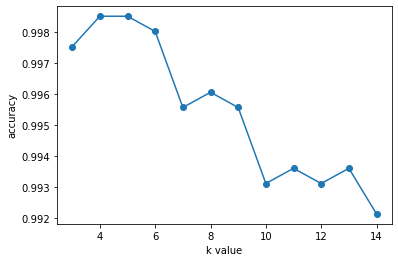

In [24]:
acc_val = []
neighbors = np.arange(3,15) # taking values from 3-15

# creating a loop to create knn model for each k value

for k in neighbors:
    #creating an instance for knn
    classifier = KNeighborsClassifier(n_neighbors=k,metric = "minkowski") # mentioning the k values , 
    # and type of distance measurement
    classifier.fit(x_train,y_train)
    predicts = classifier.predict(x_test)
    # Next, we append the accuracy values to the empty list, to find the max accuracy
    acc = accuracy_score(y_test,predicts)
    acc_val.append(acc)
    
plt.plot(neighbors,acc_val,"o-")
plt.xlabel("k value")
plt.ylabel("accuracy")

We see that at k = 5 , we get highest accuracy score, so we make a model with k = 5

In [25]:
classifer = KNeighborsClassifier(n_neighbors=5,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict1)}")
print("\nf1_score is :" ,f1_score(y_test,predict1))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict1)}")

Accuracy score = 0.9985228951255539

f1_score is : 0.9984350547730829

confusion_matrix = 
[[1071    1]
 [   2  957]]


We get an Accuracy score of `99.9%`

### 3. SVM Classification :

In [26]:
from sklearn.svm import SVC

svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
predict2 = svm.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict2)}")
print("\nf1_score is :" ,f1_score(y_test,predict2))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict2)}")

Accuracy score = 1.0

f1_score is : 1.0

confusion_matrix = 
[[1072    0]
 [   0  959]]


We get a `100%` Accuracy for this model.

### 4. Decision Tree Classification :

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict3 = dt.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict3)}")
print("\nf1_score is :" ,f1_score(y_test,predict3))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict3)}")

Accuracy score = 1.0

f1_score is : 1.0

confusion_matrix = 
[[1072    0]
 [   0  959]]


We get an Accuracy score of `100%` for this DecisionTree Model.

### 5. Random Forest Classification : 

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train,y_train)
predict4 = rfc.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict4)}")
print("\nf1_score is :" ,f1_score(y_test,predict4))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict4)}")

Accuracy score = 1.0

f1_score is : 1.0

confusion_matrix = 
[[1072    0]
 [   0  959]]


For this model we get a `100%` Accuracy.

### 6. Naive Bayes Classification :

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
predict5 = nb.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict5)}")
print("\nf1_score is :" ,f1_score(y_test,predict5))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict5)}")

Accuracy score = 0.9335302806499262

f1_score is : 0.9276139410187667

confusion_matrix = 
[[1031   41]
 [  94  865]]


We get an Accuracy score of `93.4%`.

### 7. Gradient Boosting Classifier Model :

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predict6 = gbc.predict(x_test)

print(f"Accuracy score = {accuracy_score(y_test,predict6)}")
print("\nf1_score is :" ,f1_score(y_test,predict6))
print(f"\nconfusion_matrix = \n{confusion_matrix(y_test,predict6)}")

Accuracy score = 1.0

f1_score is : 1.0

confusion_matrix = 
[[1072    0]
 [   0  959]]


We get an Accuracy score of `100%`.

## Overall Summary for the Various models created :

| Model Name | Accuracy %|
|- - -| - - -|
|*Logistic Regression Model*|95.03%|
|*kNN Model*| 99.9%|
|      |      |
|*Radial SVM Model*| 100%|
|      |      |
|*Decision tree Model*| 100%|
|*Random Forest Classifier*|100%|
|      |      |
|*Naive Bayes Classification*| 93.4%|
|      |      |
|*Gradient Boosting Classifier Model*|100%|


# Conclusion :

After Studying the above data which we obtained, we can say the folllowing :

* In general terms , all the Models are performing relatively well. However a few stand above the others.
* The one that out shine the others are mainly the Tree-based models and Radial SVM i.e. :
> * `Radial SVM Model`
> * `Decision Tree Model`,
> * `Random Forest Classifier Model`
> * `Gradient Boosting Classifier Model`.

Hence, we can use any of the above mentioned models to Classify the Mushrooms as Edible or Poisonous.